# Parameterized Dimension Alignment Distribution

**Goal:** Examine how all tokens are distributed along any specified eigenvector dimension.

We'll compute **signed** cosine similarities from -1 (antiparallel) through 0 (orthogonal) to +1 (parallel) to visualize the full distribution along this axis.

**Change the `DIMENSION` parameter in the setup cell to analyze different eigenvectors.**

## Setup

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt

PROJECTIONS_PATH = '../data/vectors/token_eigenbasis_projections_qwen3_4b.pt'

# ============================================
# PARAMETER: Change this to analyze different dimensions
DIMENSION = 2559  # Range: 0 (highest eigenvalue) to 2559 (lowest eigenvalue)
# ============================================

N_BINS = 200  # Histogram resolution (-1 to 1 in 0.01 increments)

print(f"Analyzing dimension {DIMENSION}")

Analyzing dimension 2559


## Load Data

In [23]:
print("Loading projections...")
data = torch.load(PROJECTIONS_PATH, weights_only=False)
projections = data['projections'].numpy()  # [151936, 2560]

vocab_size, hidden_dim = projections.shape
print(f"Loaded: {vocab_size:,} tokens × {hidden_dim:,} eigenvectors")
print(f"Valid dimension range: 0 to {hidden_dim - 1}")

# Validate dimension parameter
if not (0 <= DIMENSION < hidden_dim):
    raise ValueError(f"DIMENSION must be between 0 and {hidden_dim - 1}, got {DIMENSION}")

Loading projections...
Loaded: 151,936 tokens × 2,560 eigenvectors
Valid dimension range: 0 to 2559


## Compute Signed Cosine Similarities

In [24]:
print(f"\nComputing signed cosine similarities to dimension {DIMENSION}...")

# Token norms
norms = np.linalg.norm(projections, axis=1)  # [151936]

# SIGNED cosine similarities (no abs!)
cosines = projections[:, DIMENSION] / norms  # [151936], range [-1, 1]

print(f"Total tokens: {len(cosines):,}")
print(f"Range: [{cosines.min():.4f}, {cosines.max():.4f}]")


Computing signed cosine similarities to dimension 2559...
Total tokens: 151,936
Range: [-0.2019, -0.0173]


## Summary Statistics

In [25]:
print(f"\nDistribution statistics for dimension {DIMENSION}:")
print(f"  Mean:   {cosines.mean():.4f}")
print(f"  Median: {np.median(cosines):.4f}")
print(f"  Std:    {cosines.std():.4f}")
print(f"\nPercentiles:")
for p in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    val = np.percentile(cosines, p)
    print(f"  {p:2d}th: {val:.4f}")


Distribution statistics for dimension 2559:
  Mean:   -0.0568
  Median: -0.0532
  Std:    0.0177

Percentiles:
   1th: -0.1610
   5th: -0.0737
  10th: -0.0631
  25th: -0.0572
  50th: -0.0532
  75th: -0.0499
  90th: -0.0470
  95th: -0.0454
  99th: -0.0427


## Histogram

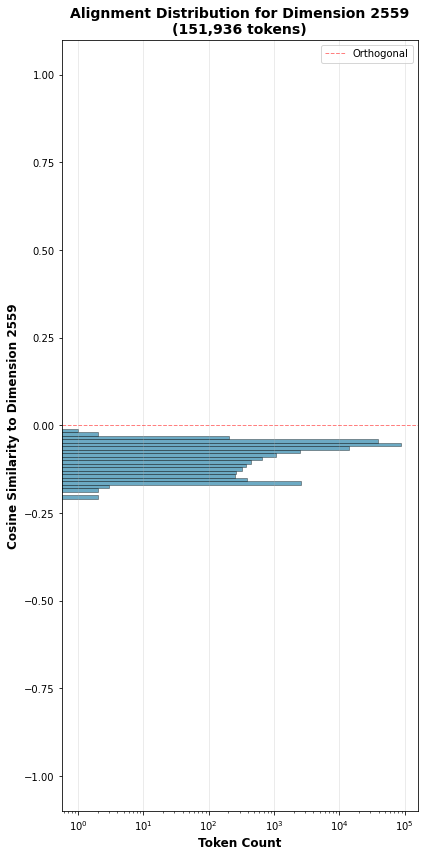

In [26]:
fig, ax = plt.subplots(figsize=(6, 12), dpi=72)

# Histogram - ROTATED: cosine on Y-axis, count on X-axis
counts, bins, patches = ax.hist(
    cosines,
    bins=N_BINS,
    range=(-1.0, 1.0),
    orientation='horizontal',  # Rotate the histogram
    color='#2E86AB',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

ax.set_ylabel(f'Cosine Similarity to Dimension {DIMENSION}', fontsize=12, fontweight='bold')
ax.set_xlabel('Token Count', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.set_title(
    f'Alignment Distribution for Dimension {DIMENSION}\n({len(cosines):,} tokens)',
    fontsize=14,
    fontweight='bold'
)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Orthogonal')
ax.grid(True, alpha=0.3, axis='x')
ax.legend()

plt.tight_layout()
plt.show()